# Decision Tree

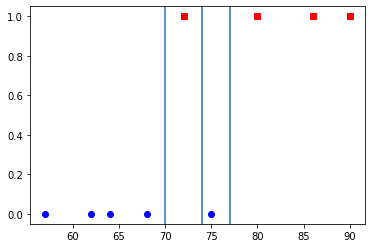

In [2]:
import numpy as np
import matplotlib.pyplot as plt

exam=[90,86,72,80,57,68,64,75,62]
grade=[1,1,1,1,0,0,0,0,0]

plt.plot(exam,[i if i==1 else None for i in grade],'rs')
plt.plot(exam,[i if i==0 else None for i in grade],'bo')
plt.axvline(x=77)
plt.axvline(x=74)
plt.axvline(x=70)

* 나무 구조로 데이터를 분류

### 어떤 질문을 해야할까? Gini Coefficient and Entropy
$$ \text{Gini}: G=1-\sum_i p_i^2 $$
$$ \text{Entropy}: \quad S=- \sum_i p_i \log p_i $$


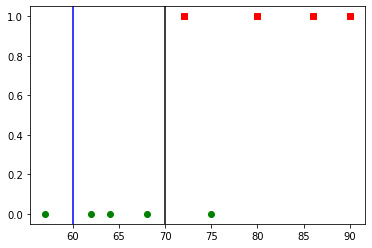

In [3]:
plt.plot(exam,[i if i==1 else None for i in grade],'rs')
plt.plot(exam,[i if i==0 else None for i in grade],'go')
plt.axvline(x=60,color='b')
plt.axvline(x=70,color='k')

$$
\begin{align} 
S_o &= - \frac{5}{9} \log \frac{5}{9}  -\frac{4}{9} \log \frac{4}{9}, \\ 
S_{blue} & = - \frac{1}{9} [ 1\log{1} + 0 ] -\frac{8}{9} [\frac{4}{8} \log \frac{4}{8}+\frac{4}{8} \log \frac{4}{8}],\\ 
S_{black} & = -\frac{4}{9} [ 1\log{1} + 0 ] -\frac{5}{9} [\frac{4}{5} \log \frac{4}{5}+\frac{1}{5} \log \frac{1}{5}].
\end{align}
$$

In [4]:
so=-(5/9)*np.log(5/9)-(4/9)*np.log(4/9);
sb=-(1/9)*0-(8/9)*((4/8)*np.log(4/8)+(4/8)*np.log(4/8))
sk=-(4/9)*0-(4/9)*((4/5)*np.log(4/5)+(1/5)*np.log(1/5))
so-sb, so-sk

(0.07083074943292755, 0.4645604994692399)

$$ \begin{align}
G_0 &= 1-\left( \frac{4}{9} \right)^2 - \left( \frac{5}{9} \right)^2, \\ 
G_b &= \frac{1}{9} \left[1- \left( \frac{1}{1} \right)^2 +\left(\frac{0}{1} \right)^2 \right] 
+\frac{8}{9} \left[1- \left( \frac{4}{8} \right)^2 +\left(\frac{4}{8} \right)^2 \right], \\
G_k &=\frac{4}{9} \left[1- \left( \frac{4}{4} \right)^2 +\left(\frac{0}{4} \right)^2 \right] 
+\frac{5}{9} \left[1- \left( \frac{4}{5} \right)^2 +\left(\frac{1}{5} \right)^2 \right].
\end{align}
$$

### Iris data

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import tree
iris = datasets.load_iris() # 분꽃

In [29]:
X=iris.data
y=iris.target
clf=tree.DecisionTreeClassifier(max_depth=3)

In [30]:
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
clf.score(X,y)

0.9733333333333334

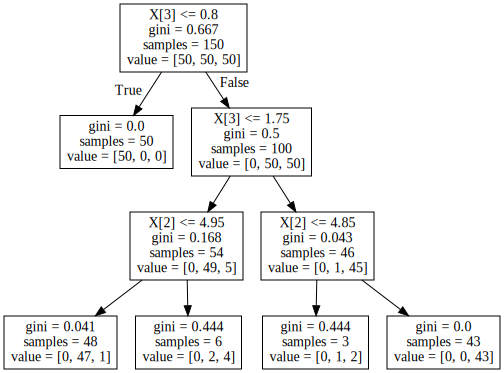

In [33]:
import graphviz # https://graphviz.org/
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

* Overfitting에 주의하세요! (max_depth)